<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [4]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [5]:
import yfinance as yf

# Crear el objeto Ticker para Tesla
tesla = yf.Ticker("TSLA")

# Verificar información básica sobre Tesla
print(tesla.info)  # Muestra un resumen de la información disponible



{'address1': '1 Tesla Road', 'city': 'Austin', 'state': 'TX', 'zip': '78725', 'country': 'United States', 'phone': '512 516 8177', 'website': 'https://www.tesla.com', 'industry': 'Auto Manufacturers', 'industryKey': 'auto-manufacturers', 'industryDisp': 'Auto Manufacturers', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehicle sales, a n

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [6]:
import yfinance as yf

# Crear el objeto Ticker para Tesla
tesla = yf.Ticker("TSLA")
# Extraer la información histórica con el periodo máximo
tesla_data = tesla.history(period="max")
# Mostrar las primeras filas del DataFrame
print(tesla_data.head())


                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [7]:
import yfinance as yf

# Crear el objeto Ticker para Tesla
tesla = yf.Ticker("TSLA")

# Extraer la información histórica con el periodo máximo
tesla_data = tesla.history(period="max")

# Restablecer el índice del DataFrame
tesla_data.reset_index(inplace=True)

# Mostrar las primeras cinco filas del DataFrame
print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [8]:
import requests

# URL de la página web
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Descargar el contenido de la página web
response = requests.get(url)

# Guardar el texto de la respuesta en la variable html_data
html_data = response.text

# Verificar los primeros 500 caracteres del contenido descargado
print(html_data[:500])  # Esto muestra un fragmento para confirmar la descarga



<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
	


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [9]:
from bs4 import BeautifulSoup

# Analizar los datos HTML usando BeautifulSoup y el analizador html.parser
soup = BeautifulSoup(html_data, 'html.parser')

# Opcional: Verificar el título de la página para confirmar el análisis
print(soup.title.text)


Tesla Revenue 2010-2022 | TSLA | MacroTrends


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [10]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

# Step 1: Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text

# Step 2: Parse the HTML data
soup = BeautifulSoup(html_data, 'html.parser')

# Step 3: Find the relevant table (index 1)
table = soup.find_all("tbody")[1]

# Step 4: Create an empty DataFrame
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Step 5: Iterate through rows in the table body
for row in table.find_all("tr"):
    cols = row.find_all("td")
    date = cols[0].text.strip()  # Extract Date
    revenue = cols[1].text.strip()  # Extract Revenue

    # Step 6: Append data to the DataFrame
    tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

# Display the first few rows of the DataFrame
print(tesla_revenue.head())


         Date  Revenue
0  2022-09-30  $21,454
1  2022-06-30  $16,934
2  2022-03-31  $18,756
3  2021-12-31  $17,719
4  2021-09-30  $13,757


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [11]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

Execute the following lines to remove an null or empty strings in the Revenue column.


In [12]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [13]:
# Mostrar las últimas 5 filas del DataFrame
print(tesla_revenue.tail())

          Date Revenue
48  2010-09-30     $31
49  2010-06-30     $28
50  2010-03-31     $21
52  2009-09-30     $46
53  2009-06-30     $27


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [14]:
import yfinance as yf

# Crear el objeto Ticker para GameStop
gamestop = yf.Ticker("GME")

# Verificar la información básica sobre GameStop
print(gamestop.info)  # Muestra información disponible sobre la compañía


{'address1': '625 Westport Parkway', 'city': 'Grapevine', 'state': 'TX', 'zip': '76051', 'country': 'United States', 'phone': '817 424 2000', 'website': 'https://www.gamestop.com', 'industry': 'Specialty Retail', 'industryKey': 'specialty-retail', 'industryDisp': 'Specialty Retail', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': 'GameStop Corp., a specialty retailer, provides games and entertainment products through its stores and ecommerce platforms in the United States, Canada, Australia, and Europe. The company sells new and pre-owned gaming platforms; accessories, such as controllers, gaming headsets, and virtual reality products; new and pre-owned gaming software; and in-game digital currency, digital downloadable content, and full-game downloads. It sells collectibles comprising apparel, toys, trading cards, gadgets, and other retail products for pop culture and technology enthusiasts, as well as engages 

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [15]:
import yfinance as yf

# Crear el objeto Ticker para GameStop
gamestop = yf.Ticker("GME")

# Extraer la información histórica con el periodo máximo
gme_data = gamestop.history(period="max")

# Mostrar las primeras filas del DataFrame para verificar
print(gme_data.head())


                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [16]:
import yfinance as yf

# Crear el objeto Ticker para GameStop
gamestop = yf.Ticker("GME")

# Extraer la información histórica con el periodo máximo
gme_data = gamestop.history(period="max")

# Reiniciar el índice del DataFrame
gme_data.reset_index(inplace=True)

# Mostrar las primeras cinco filas del DataFrame
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [17]:
import requests

# URL de la página web
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Descargar el contenido de la página web
response = requests.get(url)

# Guardar el texto de la respuesta en la variable html_data_2
html_data_2 = response.text

# Mostrar una muestra del contenido descargado
print(html_data_2[:500])  # Muestra los primeros 500 caracteres para confirmar


<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface g


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [18]:
from bs4 import BeautifulSoup

# Analizar los datos HTML usando BeautifulSoup y el analizador html.parser
soup = BeautifulSoup(html_data_2, 'html.parser')

# Opcional: Verificar el título de la página para confirmar el análisis
print(soup.title.text)


GameStop Revenue 2006-2020 | GME | MacroTrends


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [20]:
import pandas as pd
from bs4 import BeautifulSoup

# Asegúrate de que ya tienes el objeto `soup`
# soup = BeautifulSoup(html_data_2, 'html.parser')
import pandas as pd
from bs4 import BeautifulSoup

# Asegúrate de que el objeto `soup` ya contiene los datos HTML analizados
# soup = BeautifulSoup(html_data_2, 'html.parser')

# Aislar el segundo <tbody> de la página
table = soup.find_all("tbody")[1]

# Crear un DataFrame vacío
stock_data = pd.DataFrame()

# Iterar a través de las filas de la tabla
for row in table.find_all("tr"):
    cols = row.find_all("td")
    data = [col.text.strip() for col in cols]
    
    # Verificar la cantidad de columnas en la fila actual
    if len(stock_data.columns) == 0:
        # Inicializar las columnas según la primera fila de datos
        stock_data = pd.DataFrame(columns=[f"Column{i+1}" for i in range(len(data))])
    
    # Agregar la fila al DataFrame
    stock_data = pd.concat([stock_data, pd.DataFrame([data], columns=stock_data.columns)], ignore_index=True)

# Verificar las primeras filas
print(stock_data.head())



      Column1 Column2
0  2020-04-30  $1,021
1  2020-01-31  $2,194
2  2019-10-31  $1,439
3  2019-07-31  $1,286
4  2019-04-30  $1,548


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [23]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
# Descargar la página HTML
url = "https://cf-courses-data.s3.u.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_data = response.text
# Analizar el HTML
soup = BeautifulSoup(html_data, 'html.parser')
# Aislar la tabla relevante
table = soup.find_all("tbody")[1]
# Crear el DataFrame
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
# Extraer filas y columnas
for row in table.find_all("tr"):
    cols = row.find_all("td")
    date = cols[0].text.strip()  # Columna de fecha
    revenue = cols[1].text.strip()  # Columna de ingresos
    gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)
# Mostrar las últimas cinco filas
print(gme_revenue.tail())

          Date Revenue
57  2006-01-31  $1,667
58  2005-10-31    $534
59  2005-07-31    $416
60  2005-04-30    $475
61  2005-01-31    $709


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


In [24]:
print("Variables definidas en el entorno:")
print(dir())


Variables definidas en el entorno:
['BeautifulSoup', 'In', 'Out', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__session__', '__spec__', '_dh', '_exit_code', '_i', '_i1', '_i10', '_i11', '_i12', '_i13', '_i14', '_i15', '_i16', '_i17', '_i18', '_i19', '_i2', '_i20', '_i21', '_i22', '_i23', '_i24', '_i3', '_i4', '_i5', '_i6', '_i7', '_i8', '_i9', '_ih', '_ii', '_iii', '_oh', 'cols', 'data', 'date', 'exit', 'gamestop', 'get_ipython', 'gme_data', 'gme_revenue', 'go', 'html_data', 'html_data_2', 'make_graph', 'make_subplots', 'open', 'pd', 'quit', 'requests', 'response', 'revenue', 'row', 'soup', 'stock_data', 'table', 'tesla', 'tesla_data', 'tesla_revenue', 'url', 'warnings', 'yf']


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


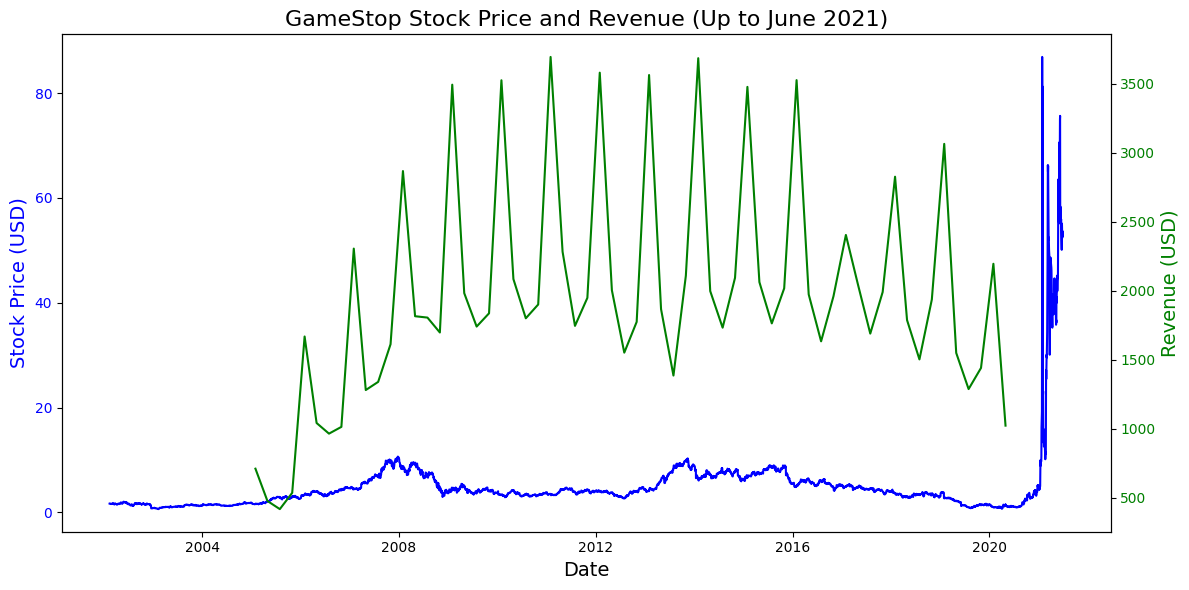

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
# Descargar la página HTML que contiene los datos de ingresos
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_data = response.text
# Analizar el HTML
soup = BeautifulSoup(html_data, 'html.parser')
# Aislar la tabla relevante de ingresos
table = soup.find_all("tbody")[1]

# Crear el DataFrame para los ingresos
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in table.find_all("tr"):
    cols = row.find_all("td")
    date = cols[0].text.strip()  # Columna de fecha
    revenue = cols[1].text.strip()  # Columna de ingresos
    gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)
# Descargar los datos históricos de precios de las acciones de GameStop
import yfinance as yf
gamestop = yf.Ticker("GME")
gme_data = gamestop.history(period="max").reset_index()
# Asegurarse de que las fechas están en formato datetime
gme_data['Date'] = pd.to_datetime(gme_data['Date'], errors='coerce')
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'], errors='coerce')
# Limpiar la columna Revenue (quitar $ y ,)
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',', '').str.replace('$', '', regex=False)
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')
# Eliminar filas con valores nulos
gme_data.dropna(subset=['Date', 'Close'], inplace=True)
gme_revenue.dropna(subset=['Date', 'Revenue'], inplace=True)
# Filtrar datos hasta junio de 2021
gme_data_filtered = gme_data[gme_data['Date'] <= '2021-06-30']
gme_revenue_filtered = gme_revenue[gme_revenue['Date'] <= '2021-06-30']
# Definir la función para graficar
def make_graph(stock_data, revenue_data, title):
    """
    Grafica los datos de precios de acciones junto con los ingresos.
    
    Parameters:
        stock_data (DataFrame): DataFrame con los datos de las acciones, debe incluir 'Date' y 'Close'.
        revenue_data (DataFrame): DataFrame con los datos de ingresos, debe incluir 'Date' y 'Revenue'.
        title (str): Título del gráfico.
    """
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Graficar precios de las acciones
    ax1.plot(stock_data['Date'], stock_data['Close'], color='blue', label="Stock Price")
    ax1.set_xlabel('Date', fontsize=14)
    ax1.set_ylabel('Stock Price (USD)', color='blue', fontsize=14)
    ax1.tick_params(axis='y', labelcolor='blue')

    # Graficar ingresos
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='green', label="Revenue")
    ax2.set_ylabel('Revenue (USD)', color='green', fontsize=14)
    ax2.tick_params(axis='y', labelcolor='green')

    # Configuración del título y leyenda
    plt.title(title, fontsize=16)
    fig.tight_layout()
    plt.show()

# Llamar a la función para graficar
make_graph(gme_data_filtered, gme_revenue_filtered, 'GameStop Stock Price and Revenue (Up to June 2021)')



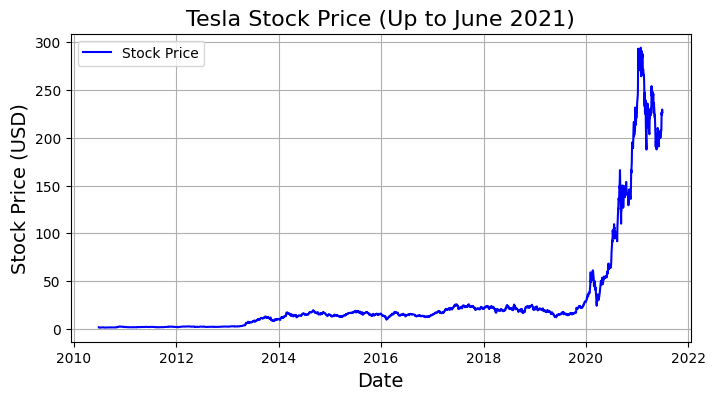

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

# Descargar los datos históricos de Tesla
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max").reset_index()
# Crear la función para graficar
def make_graph(stock_data, title):
    """
    Graficar los datos de precios de acciones.
    Parameters:
        stock_data (DataFrame): Datos de acciones (debe contener 'Date' y 'Close').
        title (str): Título del gráfico.
    """
    plt.figure(figsize=(8, 4))
    plt.plot(stock_data['Date'], stock_data['Close'], label="Stock Price", color="blue")
    plt.title(title, fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Stock Price (USD)", fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()
# Filtrar datos hasta junio de 2021
tesla_data_filtered = tesla_data[tesla_data['Date'] <= '2021-06-30']
# Graficar los datos de Tesla
make_graph(tesla_data_filtered, "Tesla Stock Price (Up to June 2021)")


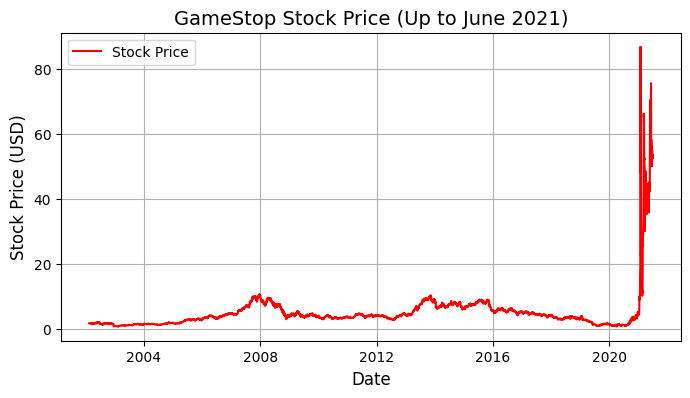

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
# Descargar los datos históricos de GameStop
gamestop = yf.Ticker("GME")
gme_data = gamestop.history(period="max").reset_index()
# Crear la función para graficar
def make_graph(stock_data, title):
    """
    Graficar los datos de precios de acciones.
    Parameters:
        stock_data (DataFrame): Datos de acciones (debe contener 'Date' y 'Close').
        title (str): Título del gráfico.
    """
    plt.figure(figsize=(8, 4))  # Tamaño compacto del gráfico
    plt.plot(stock_data['Date'], stock_data['Close'], label="Stock Price", color="red")
    plt.title(title, fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Stock Price (USD)", fontsize=12)
    plt.legend()
    plt.grid()
    plt.show()
# Filtrar datos hasta junio de 2021
gme_data_filtered = gme_data[gme_data['Date'] <= '2021-06-30']

# Graficar los datos de GameStop
make_graph(gme_data_filtered, "GameStop Stock Price (Up to June 2021)")


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
